In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Loading the data

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Checking Null values

In [6]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Imputing null values with mean

In [7]:
df = df.fillna(df.mean())

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_16064\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

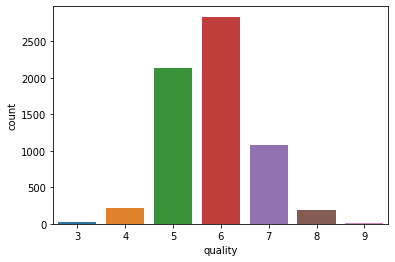

In [9]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='quality', data=df)

## Checking duplicated values

In [10]:
df.duplicated().sum()

1168

### Dropping the duplicated values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5329, 13)

<AxesSubplot:>

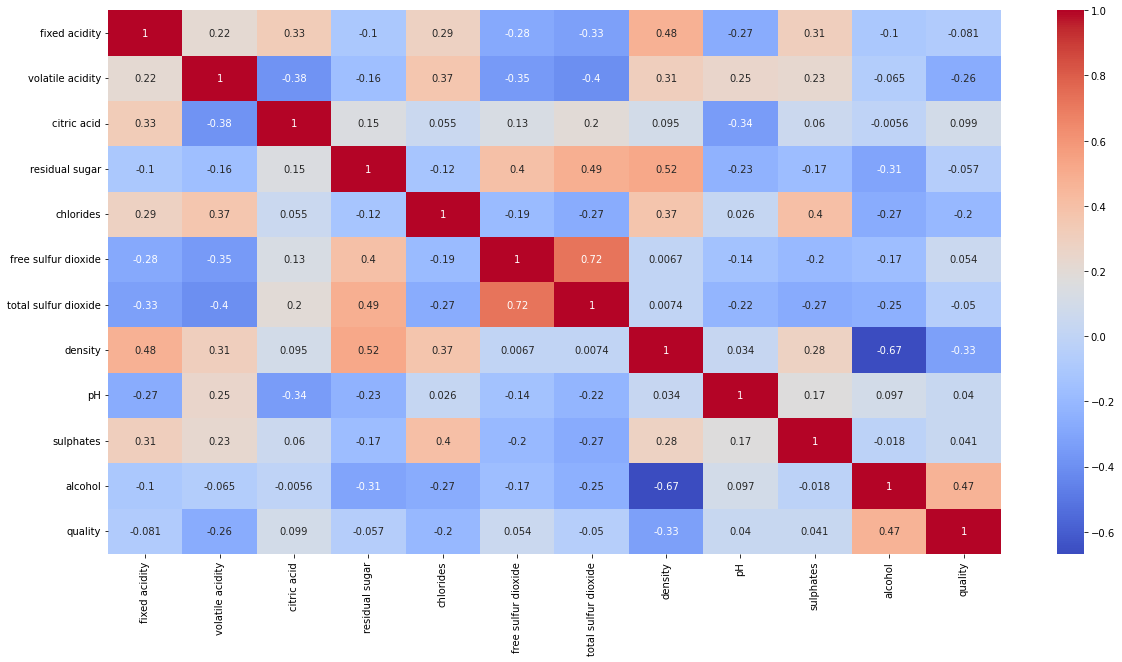

In [13]:
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [14]:
df.duplicated().sum()

0

## Checking Outliers

In [15]:
# import warnings

# # outlier check
# plt.figure(figsize=(15, 20))

# for i, c in enumerate(df.drop('quality', axis=1).select_dtypes(include='number').columns):
#     plt.subplot(10,2,i*2+1)
#     sns.boxplot(df[c], color='blue')
#     plt.title('Distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
#     plt.subplot(10,2,i*2+2)
#     sns.boxplot(df[c].apply('log1p'), color='red')
#     plt.title('Log1p distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [16]:
df['type'].unique()

array(['white', 'red'], dtype=object)

## Treating cat variables

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.type.head()

0    1
1    1
2    1
3    1
6    1
Name: type, dtype: int32

In [18]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   int32  
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 562.0 KB


## Data splitting

In [20]:
target = 'quality'
y = df[target]
X = df.drop(target,axis=1)

In [21]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


## Data Balancing using SMOTE

In [22]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X_resampled, y_resampled = oversample.fit_resample(X,y)

In [24]:
X_resampled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [25]:
df['quality'] = df['quality'].apply({3:0,4:1,5:2,6:3,7:4,8:5,9:6}.get)

In [26]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [27]:
y_resampled.value_counts()

6    2327
5    2327
7    2327
8    2327
4    2327
3    2327
9    2327
Name: quality, dtype: int64

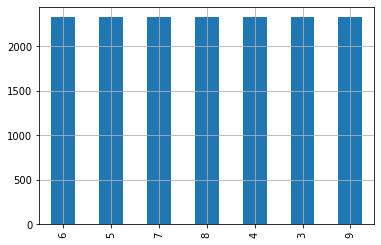

In [28]:
pd.Series(y_resampled).value_counts().plot.bar()
plt.grid()

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


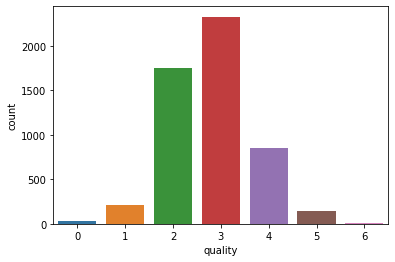

In [29]:
sns.countplot(df['quality'])
plt.show()

## Train test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.05,random_state=123)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
#checking the mean value after scaling
scaler.mean_

array([7.61600103e-01, 7.28955636e+00, 3.70399337e-01, 3.20460407e-01,
       4.65999502e+00, 5.30025250e-02, 2.99935014e+01, 1.11839405e+02,
       9.93871495e-01, 3.24749528e+00, 5.15921908e-01, 1.09360121e+01])

In [33]:
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
9475,1,6.692563,0.390520,0.546693,1.210036,0.073929,9.475810,151.000000,0.993220,3.084498,0.570000,9.417473
15795,1,6.953043,0.333479,0.379782,3.669573,0.021713,50.104451,117.408720,0.989933,3.303869,0.375913,12.753043
4319,0,7.700000,0.260000,0.300000,1.700000,0.059000,20.000000,38.000000,0.994900,3.290000,0.470000,10.800000
12399,1,7.039049,0.402953,0.308285,12.179086,0.036800,29.923693,137.733396,0.994156,3.101715,0.388573,11.756194
7137,0,7.217744,0.895213,0.145805,4.377579,0.069662,5.000000,15.822560,0.994741,3.513356,0.478033,11.392573
...,...,...,...,...,...,...,...,...,...,...,...,...
12252,1,6.081205,0.283590,0.305855,10.312768,0.037359,31.679520,115.226507,0.994069,3.263927,0.441494,10.885061
1346,1,9.300000,0.310000,0.490000,1.300000,0.042000,34.000000,147.000000,0.994800,3.110000,0.460000,9.800000
11646,1,6.880310,0.376062,0.314875,2.949527,0.043059,22.871883,111.709372,0.991235,3.157687,0.349656,11.445314
15725,1,8.964750,0.275533,0.443237,10.206544,0.033955,29.782847,123.692613,0.996557,3.204918,0.453852,10.541398


In [34]:
X_test

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2001,1,8.000000,0.360000,0.390000,1.600000,0.024000,26.000000,93.000000,0.991160,3.150000,0.490000,11.900000
174,1,6.900000,0.540000,0.320000,13.200000,0.050000,53.000000,236.000000,0.997300,3.200000,0.500000,9.600000
9225,1,8.528175,0.286254,0.538453,1.562540,0.046000,8.969051,69.656350,0.993960,3.087492,0.580619,10.593810
12694,0,12.196763,0.406157,0.704491,3.130547,0.076343,6.000000,25.898177,0.998731,2.985462,0.779676,10.916656
11613,1,6.574498,0.449521,0.311036,1.561360,0.024765,21.462133,120.820711,0.989011,3.180479,0.508485,12.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
11753,0,8.900000,0.383634,0.419987,2.272681,0.065093,12.181702,27.818298,0.994885,3.279085,0.777255,12.745362
1533,1,7.500000,0.330000,0.390000,12.400000,0.065000,29.000000,119.000000,0.997400,3.160000,0.390000,9.400000
10221,1,6.818238,0.276129,0.216498,17.476024,0.034131,16.087561,116.131341,0.998773,3.083572,0.526498,9.235024
12830,1,7.501681,0.204034,0.369118,3.366173,0.029525,59.613451,182.386549,0.991746,3.137731,0.636639,12.152522


In [35]:
X_train_scaled

array([[ 0.5594864 , -0.49036617,  0.10314638, ..., -1.09720482,
         0.41439611, -1.21148201],
       [ 0.5594864 , -0.27640999, -0.18927166, ...,  0.37947762,
        -1.07287859,  1.44961688],
       [-1.78735354,  0.33713554, -0.56595564, ...,  0.2861179 ,
        -0.35189592, -0.10850967],
       ...,
       [ 0.5594864 , -0.33615248,  0.02902884, ..., -0.6045388 ,
        -1.27408191,  0.40631811],
       [ 0.5594864 ,  1.375992  , -0.48632678, ..., -0.28660501,
        -0.47563482, -0.31482075],
       [ 0.5594864 , -0.56639679,  0.04921723, ..., -1.39674171,
        -1.11818794,  1.24774084]])

In [36]:
# converting the Scaled data to dataframe because it will give np arrays as output
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

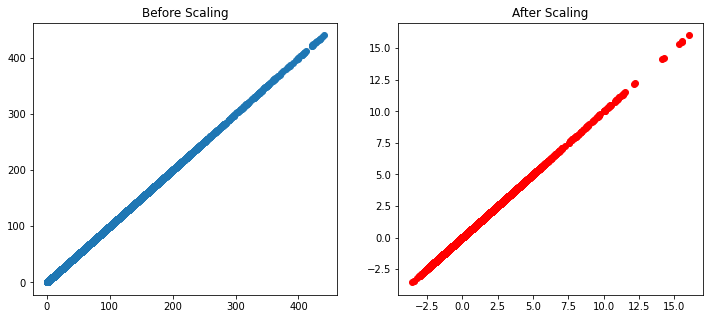

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train, X_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled, X_train_scaled,color='red')
ax2.set_title("After Scaling")
plt.show()


# below we can observe that the origin has changed after scaling 

# PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA().fit(X_resampled)

In [40]:
print(pca.explained_variance_ratio_*100)

[9.39382325e+01 5.70722930e+00 2.81965175e-01 4.25453481e-02
 2.64089047e-02 2.18191057e-03 5.94852325e-04 3.56230245e-04
 2.75762382e-04 1.93905365e-04 1.60648580e-05 1.03840961e-08]


Text(0, 0.5, 'comulative explained variance')

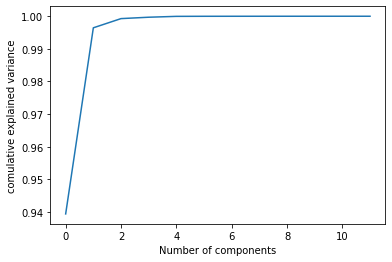

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('comulative explained variance')

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.93938233, 0.99645462, 0.99927427, 0.99969972, 0.99996381,
       0.99998563, 0.99999158, 0.99999514, 0.9999979 , 0.99999984,
       1.        , 1.        ])

In [43]:
pca.get_feature_names_out

<bound method _ClassNamePrefixFeaturesOutMixin.get_feature_names_out of PCA()>

In [44]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>99.9)
print("Number of components explaining 99% variance: "+ str(k))
#print("\n")

Number of components explaining 99% variance: 2


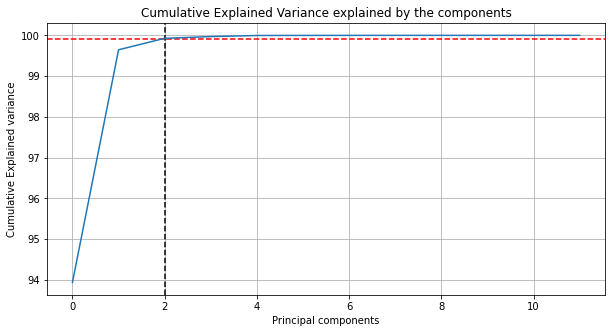

In [45]:
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99.9, color="r", linestyle="--")
plt.grid()
ax = plt.plot(var_cumu)

Text(0, 0.5, 'comulative explained variance')

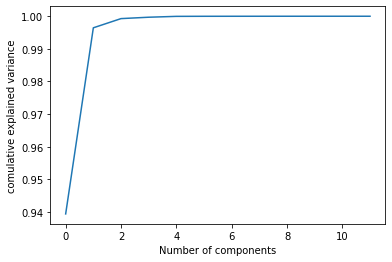

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('comulative explained variance')

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.93938233, 0.99645462, 0.99927427, 0.99969972, 0.99996381,
       0.99998563, 0.99999158, 0.99999514, 0.9999979 , 0.99999984,
       1.        , 1.        ])

 **from above graph we can observe that the first 3 components contains upto 99% of information so we can take 3 components**
 
 **now we again fit pca by taking no.of components as 3**

In [48]:
pca1 = PCA(n_components=3)
pri_comp = pca1.fit_transform(X_resampled)

In [49]:
pri_comp

array([[ 60.33591423,  -3.26642149,  14.35655313],
       [ 14.41998044, -21.09779386,  -4.17746236],
       [-14.22064432,   4.19138005,   2.89956625],
       ...,
       [-18.49387577,   1.71128205,  -2.47396765],
       [ -8.44214404,  -1.73123753,   1.52594623],
       [  4.79423044,  -1.61975115,   0.28812225]])

In [50]:
# Converting into dataframe
df1 = pd.DataFrame(data=pri_comp,columns=['PC1','PC2','PC3'])
df1.head()

,PC1,PC2,PC3
0,60.335914,-3.266421,14.356553
1,14.419980,-21.097794,-4.177462
2,-14.220644,4.191380,2.899566
3,75.871722,-5.539880,1.600524
4,23.071698,-7.172985,1.482909


In [51]:
new_df = pd.concat([df1,y_resampled],axis = 1)

In [52]:
new_df.head()

,PC1,PC2,PC3,quality
0,60.335914,-3.266421,14.356553,6
1,14.419980,-21.097794,-4.177462,6
2,-14.220644,4.191380,2.899566,6
3,75.871722,-5.539880,1.600524,6
4,23.071698,-7.172985,1.482909,6


In [53]:
X_resampled.shape,df1.shape

((16289, 12), (16289, 3))

In [54]:
y_resampled = y_resampled.apply({3:0,4:1,5:2,6:3,7:4,8:5,9:6}.get)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(df1,y_resampled,test_size=0.05,random_state=123)

## Model Building

 # Model on original data

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

# Extra tree

In [58]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)


ExtraTreesClassifier()

In [59]:
y_train_ = etc.predict(X_train)
y_test_  = etc.predict(X_test)

In [60]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9928    1.0000    0.9964       138
           4     0.9265    0.9844    0.9545       128
           5     0.8000    0.6557    0.7207       122
           6     0.6226    0.5893    0.6055       112
           7     0.7395    0.8627    0.7964       102
           8     0.9720    0.9905    0.9811       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8712       815
   macro avg     0.8648    0.8689    0.8650       815
weighted avg     0.8692    0.8712    0.8683       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

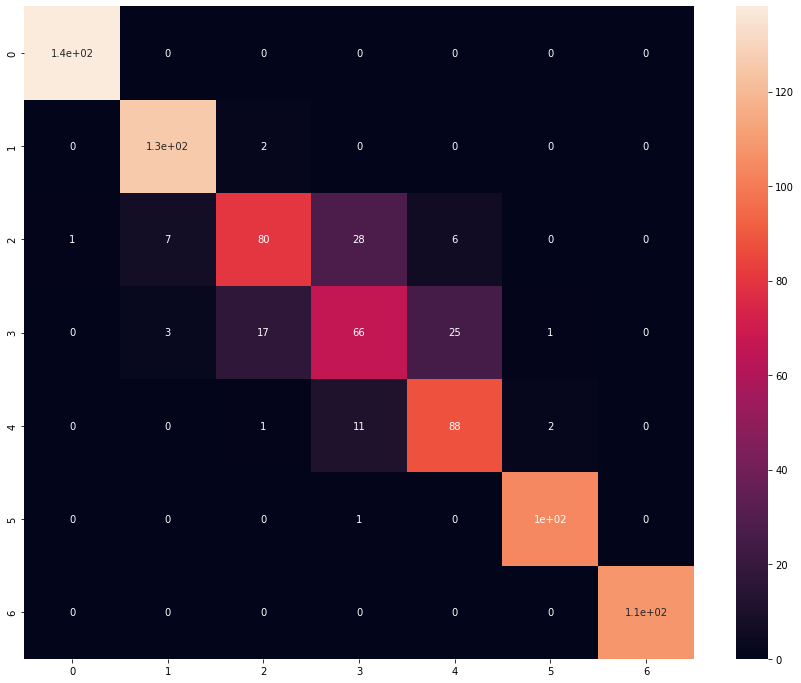

In [61]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_)
sns.heatmap(cr,annot=True)


In [62]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc1 = ExtraTreesClassifier()
etc1.fit(X_train1, y_train1)


ExtraTreesClassifier()

In [63]:
FS_pred  = etc1.predict(X_test1)

In [64]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test1, FS_pred,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8425    0.8913    0.8662       138
           1     0.7432    0.8594    0.7971       128
           2     0.5631    0.4754    0.5156       122
           3     0.4304    0.3036    0.3560       112
           4     0.6699    0.6765    0.6732       102
           5     0.7769    0.8952    0.8319       105
           6     0.9391    1.0000    0.9686       108

    accuracy                         0.7313       815
   macro avg     0.7093    0.7288    0.7155       815
weighted avg     0.7112    0.7313    0.7177       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

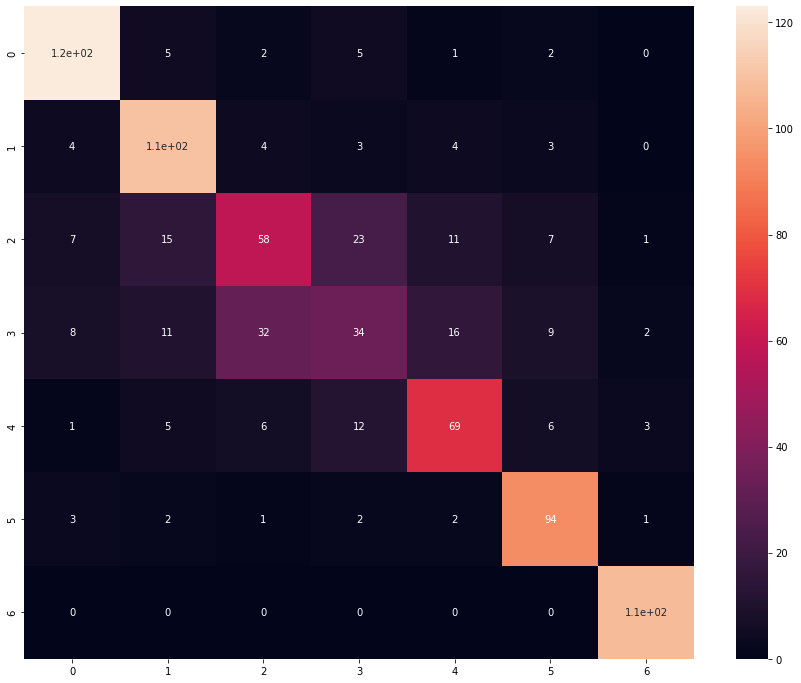

In [65]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, FS_pred)
sns.heatmap(cr,annot=True)


# DTC

In [66]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
DT = DTR.predict(X_test)

In [68]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9496    0.9565    0.9531       138
           4     0.8357    0.9141    0.8731       128
           5     0.6566    0.5328    0.5882       122
           6     0.4259    0.4107    0.4182       112
           7     0.6577    0.7157    0.6854       102
           8     0.8198    0.8667    0.8426       105
           9     1.0000    0.9907    0.9953       108

    accuracy                         0.7742       815
   macro avg     0.7636    0.7696    0.7651       815
weighted avg     0.7693    0.7742    0.7703       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

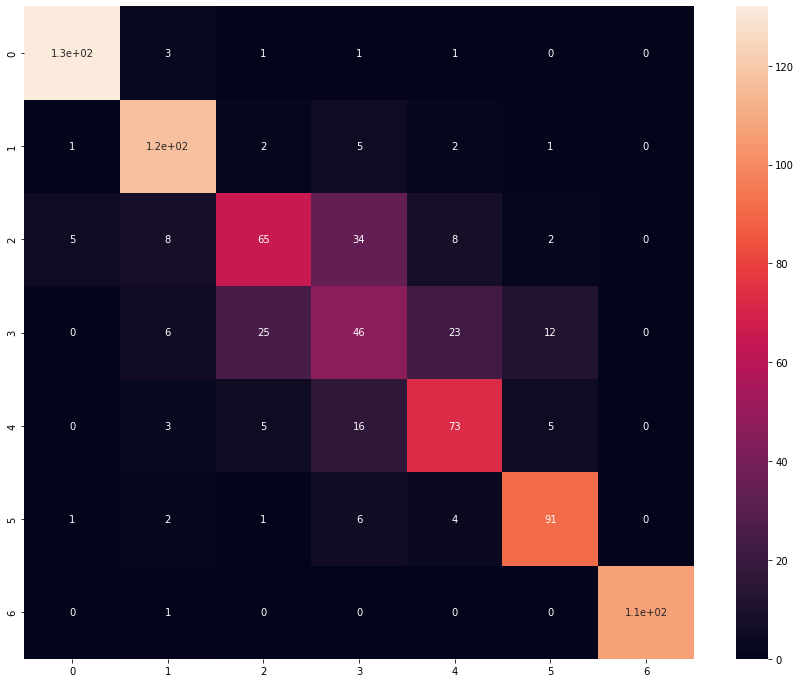

In [69]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT)
sns.heatmap(cr,annot=True)

# New data

In [70]:
from sklearn.tree import DecisionTreeClassifier
DTR1 = DecisionTreeClassifier()
DTR1.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [71]:
DT1 = DTR1.predict(X_test1)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test1, DT1,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8788    0.8406    0.8593       138
           1     0.7500    0.8203    0.7836       128
           2     0.4434    0.3852    0.4123       122
           3     0.3431    0.3125    0.3271       112
           4     0.5575    0.6176    0.5860       102
           5     0.7838    0.8286    0.8056       105
           6     0.9369    0.9630    0.9498       108

    accuracy                         0.6834       815
   macro avg     0.6705    0.6811    0.6748       815
weighted avg     0.6750    0.6834    0.6782       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

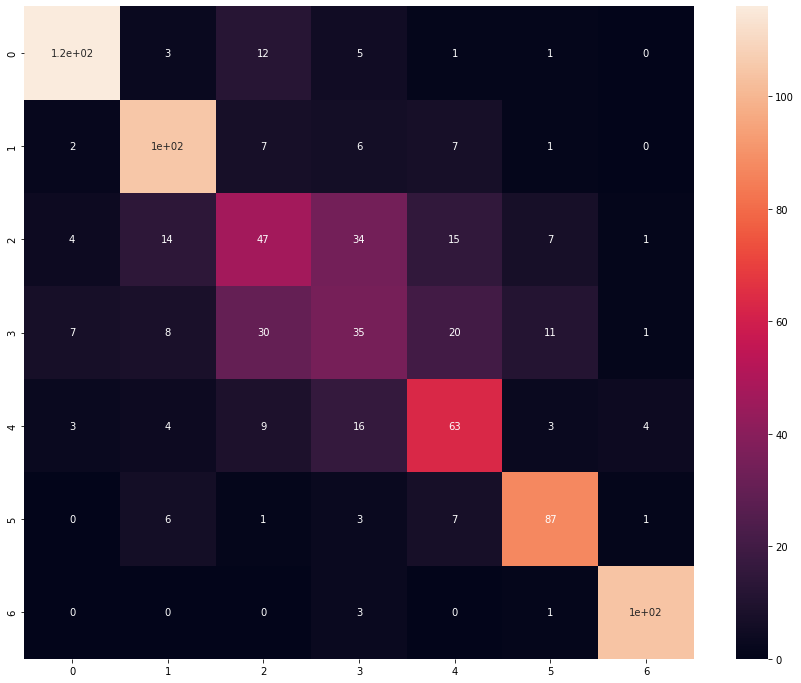

In [72]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, DT1)
sns.heatmap(cr,annot=True)

# Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)


GradientBoostingClassifier()

In [74]:
#GB1 = GB.predict(X_train)
GB_test = GB.predict(X_test)

In [75]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8851    0.9493    0.9161       138
           4     0.7985    0.8359    0.8168       128
           5     0.6306    0.5738    0.6009       122
           6     0.5667    0.4554    0.5050       112
           7     0.5429    0.5588    0.5507       102
           8     0.7542    0.8476    0.7982       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.7521       815
   macro avg     0.7384    0.7458    0.7404       815
weighted avg     0.7440    0.7521    0.7464       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

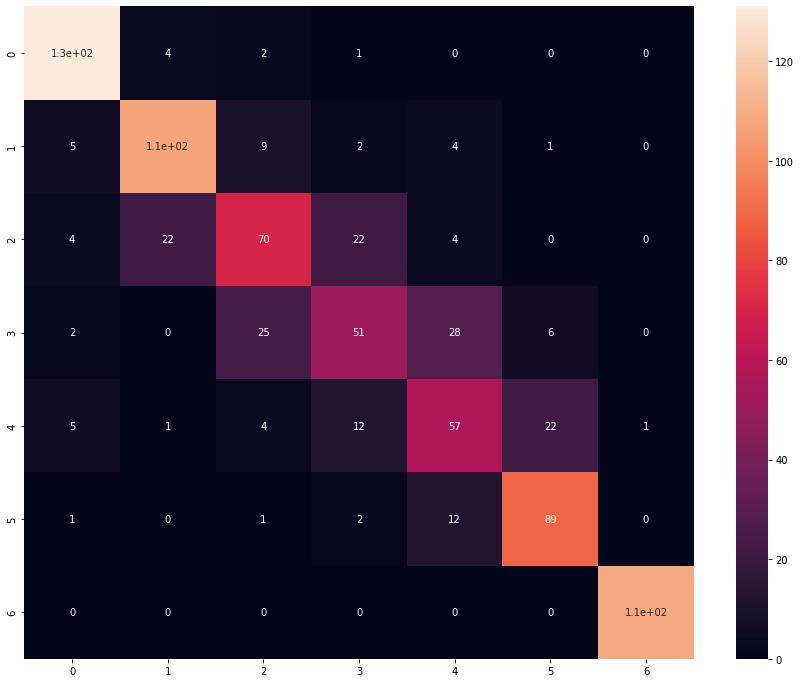

In [76]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test)
sns.heatmap(cr,annot=True)

# new data

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB1 = GradientBoostingClassifier()
GB1.fit(X_train1, y_train1)


GradientBoostingClassifier()

In [78]:
GB_test1 = GB1.predict(X_test1)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test1, GB_test1,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7032    0.7899    0.7440       138
           1     0.5344    0.5469    0.5405       128
           2     0.3465    0.2869    0.3139       122
           3     0.2955    0.1161    0.1667       112
           4     0.4815    0.3824    0.4262       102
           5     0.4444    0.5714    0.5000       105
           6     0.6369    0.9907    0.7754       108

    accuracy                         0.5313       815
   macro avg     0.4918    0.5263    0.4952       815
weighted avg     0.4974    0.5313    0.5013       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

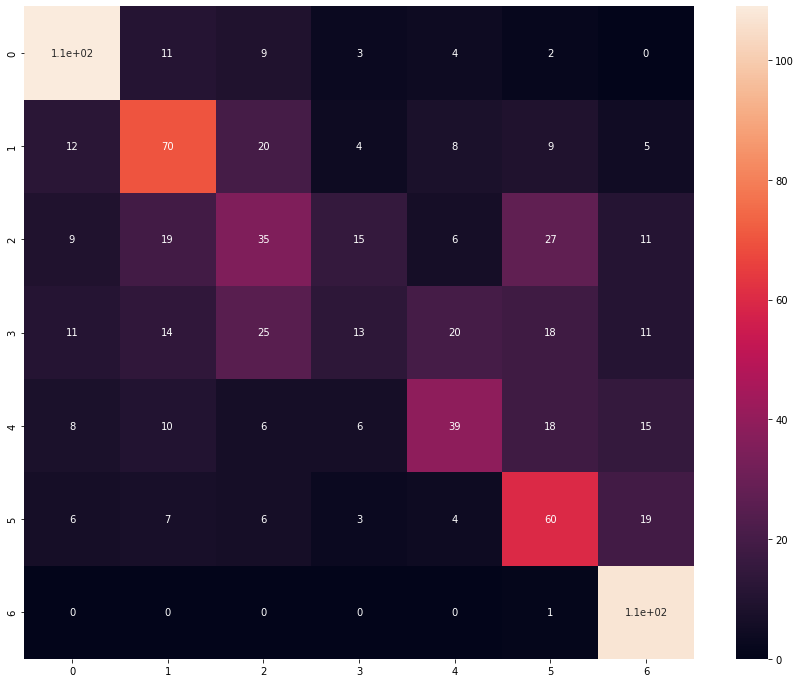

In [79]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, GB_test1)
sns.heatmap(cr,annot=True)

# Logistic regression

In [80]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
print(classification_report(y_test,LR_pred,digits=4))

              precision    recall  f1-score   support

           3     0.2948    0.3696    0.3280       138
           4     0.3901    0.4297    0.4089       128
           5     0.2688    0.2049    0.2326       122
           6     0.1923    0.0893    0.1220       112
           7     0.2083    0.0980    0.1333       102
           8     0.4048    0.4857    0.4416       105
           9     0.3901    0.6574    0.4897       108

    accuracy                         0.3350       815
   macro avg     0.3070    0.3335    0.3080       815
weighted avg     0.3078    0.3350    0.3098       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

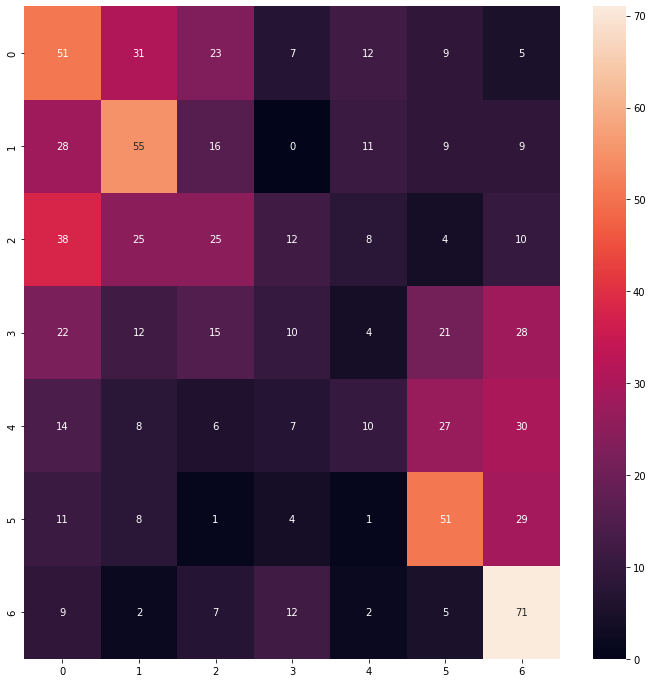

In [82]:
plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_pred)
sns.heatmap(cr,annot=True)

# New data

In [83]:
LR1 = LogisticRegression()
LR1.fit(X_train1,y_train1)
LR_test1 = LR1.predict(X_test1)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0000    0.0000    0.0000         0
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000       138
           4     0.1441    0.1328    0.1382       128
           5     0.1429    0.0082    0.0155       122
           6     0.1243    0.1964    0.1522       112
           7     0.0000    0.0000    0.0000       102
           8     0.0000    0.0000    0.0000       105
           9     0.0000    0.0000    0.0000       108

    accuracy                         0.0491       815
   macro avg     0.0411    0.0337    0.0306       815
weighted avg     0.0611    0.0491    0.0450       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

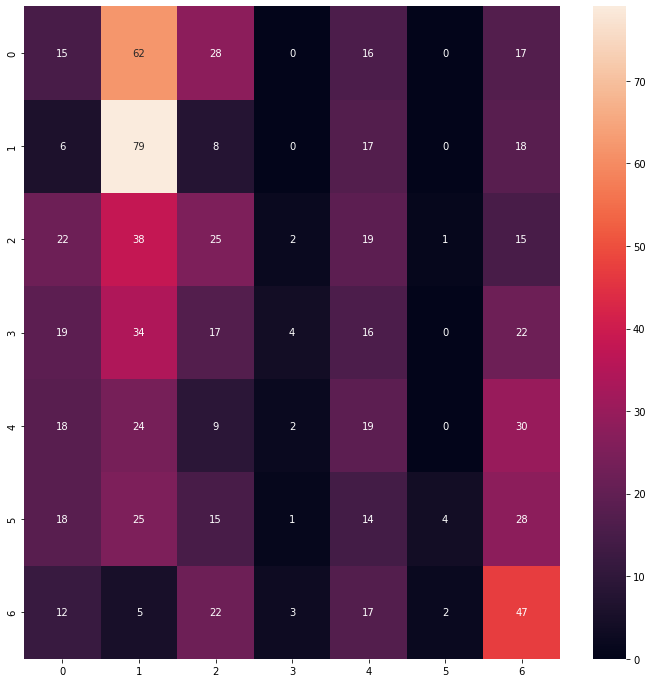

In [84]:
print(classification_report(y_test,LR_test1,digits=4))

# Confusion matrix
plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, LR_test1)
sns.heatmap(cr,annot=True)

# SVC

In [85]:
from sklearn.svm import SVC
svm = SVC(random_state=123)
svm.fit(X_train, y_train)

SVC(random_state=123)

In [86]:
svm_pred  = svm.predict(X_test)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4714    0.4783    0.4748       138
           4     0.4094    0.4766    0.4404       128
           5     0.2649    0.3279    0.2930       122
           6     0.0476    0.0089    0.0150       112
           7     0.3000    0.0588    0.0984       102
           8     0.3000    0.2000    0.2400       105
           9     0.3712    0.9074    0.5269       108

    accuracy                         0.3595       815
   macro avg     0.3092    0.3511    0.2984       815
weighted avg     0.3157    0.3595    0.3086       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

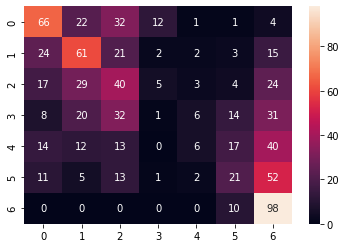

In [87]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, svm_pred,digits=4))



print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, svm_pred)
sns.heatmap(cr,annot=True)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0000    0.0000    0.0000         0
           2     0.0000    0.0000    0.0000         0
           3     0.2326    0.0725    0.1105       138
           4     0.0000    0.0000    0.0000       128
           5     0.1538    0.1475    0.1506       122
           6     0.0975    0.2054    0.1322       112
           7     0.0000    0.0000    0.0000       102
           8     0.0000    0.0000    0.0000       105
           9     0.0000    0.0000    0.0000       108

    accuracy                         0.0626       815
   macro avg     0.0484    0.0425    0.0393       815
weighted avg     0.0758    0.0626    0.0594       815

Confusion matrix
-------------------------------------------------------


C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

<AxesSubplot:>

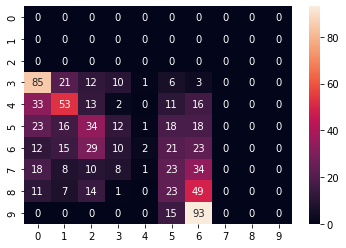

In [88]:
from sklearn.svm import SVC
svm1 = SVC(random_state=123)
svm1.fit(X_train1, y_train1)

svm_pred1  = svm1.predict(X_test1)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, svm_pred1,digits=4))



print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, svm_pred1)
sns.heatmap(cr,annot=True)


# Random Forest

RandomForestClassifier(n_jobs=-1, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8299    0.8841    0.8561       138
           1     0.7410    0.8047    0.7715       128
           2     0.4825    0.4508    0.4661       122
           3     0.4146    0.3036    0.3505       112
           4     0.6700    0.6569    0.6634       102
           5     0.7712    0.8667    0.8161       105
           6     0.9391    1.0000    0.9686       108

    accuracy                         0.7117       815
   macro avg     0.6926    0.7095    0.6989       815
weighted avg     0.6938    0.7117    0.7006       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

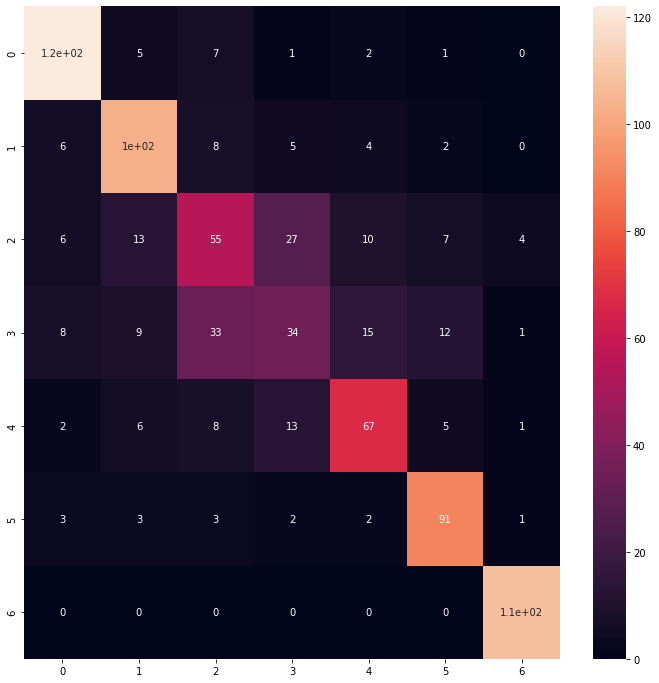

In [89]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc.fit(X_train1, y_train1)

RFC_pred = rfc.predict(X_test1)

print(rfc)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test1, RFC_pred,digits=4))

plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, RFC_pred)
sns.heatmap(cr,annot=True)


# KNN

KNeighborsClassifier()
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7602    0.9420    0.8414       138
           1     0.7279    0.8359    0.7782       128
           2     0.5116    0.3607    0.4231       122
           3     0.3836    0.2500    0.3027       112
           4     0.6263    0.6078    0.6169       102
           5     0.7355    0.8476    0.7876       105
           6     0.9153    1.0000    0.9558       108

    accuracy                         0.6969       815
   macro avg     0.6658    0.6920    0.6722       815
weighted avg     0.6668    0.6969    0.6750       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

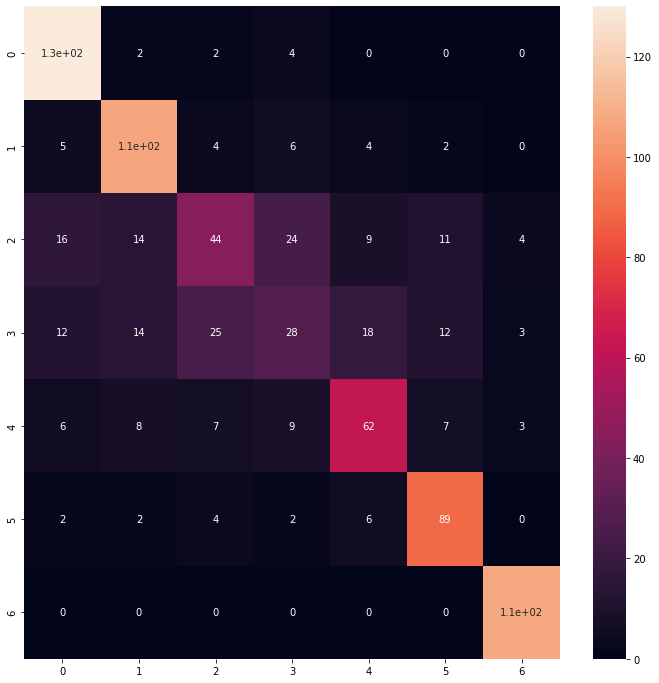

In [90]:
from sklearn.neighbors import KNeighborsClassifier
# K-Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train1, y_train1)
KNN_pred  = knn.predict(X_test1)
print(knn)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test1, KNN_pred,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, KNN_pred)
sns.heatmap(cr,annot=True)


# ABC

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       138
           1     0.5250    0.1641    0.2500       128
           2     0.1750    0.1721    0.1736       122
           3     0.0000    0.0000    0.0000       112
           4     0.1134    0.2157    0.1486       102
           5     0.1477    0.2476    0.1851       105
           6     0.3789    1.0000    0.5496       108

    accuracy                         0.2429       815
   macro avg     0.1914    0.2571    0.1867       815
weighted avg     0.1921    0.2429    0.1805       815

Confusion matrix
-------------------------------------------------------


C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<AxesSubplot:>

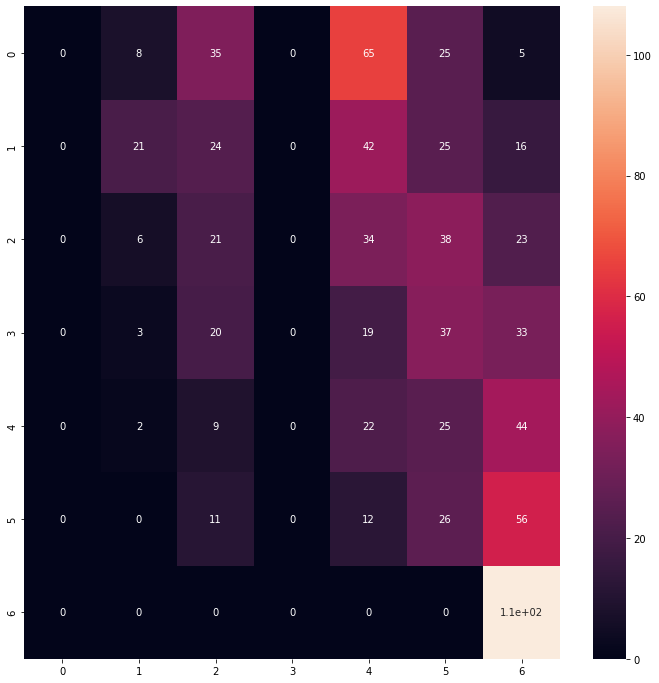

In [91]:
from sklearn.ensemble import AdaBoostClassifier
# K-Neighbors
ABC = AdaBoostClassifier(n_estimators=200,random_state=123,learning_rate=0.01)
ABC.fit(X_train1, y_train1)
ABC_pred  = ABC.predict(X_test1)
print(ABC)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test1, ABC_pred,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, ABC_pred)
sns.heatmap(cr,annot=True)


# XGB on new data

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=123, reg_alpha=0, ...)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7987    0.8913    0.8425       138
           1     0.7348    0.7578    0.7462       128
           2     0.4466    0.3770    0.4089      

<AxesSubplot:>

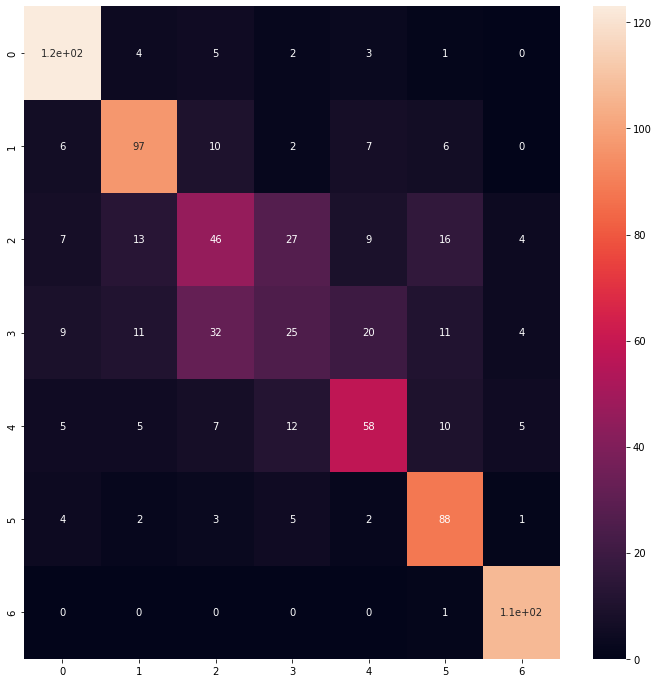

In [92]:
from xgboost import XGBClassifier

xgc = XGBClassifier(random_state=123)
xgc.fit(X_train1, y_train1)

XGB_pred3  = xgc.predict(X_test1)

print(xgc)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test1, XGB_pred3,digits=4))

# print('Roc_auc score')
# print('-------------------------------------------------------')
# print(roc_auc_score(y_test, XGB_pred))
# print('')

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test1, XGB_pred3)
sns.heatmap(cr,annot=True)


# Voting

In [94]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('RFC', rfc), ('ETC', etc),('KNN',knn)], voting='hard')
ensemble.fit(X_train1, y_train)

VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=123)),
                             ('ETC', ExtraTreesClassifier()),
                             ('KNN', KNeighborsClassifier())])

In [97]:
y_pred_voting2 = ensemble.predict(X_test1)

# evaluate the ensemble model
# accuracy = accuracy_score(y_test,y_pred_voting2)
# print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))
print(classification_report(y_test,y_pred_voting2,digits=4))

              precision    recall  f1-score   support

           3     0.8101    0.9275    0.8649       138
           4     0.7500    0.8906    0.8143       128
           5     0.5288    0.4508    0.4867       122
           6     0.4658    0.3036    0.3676       112
           7     0.7113    0.6765    0.6935       102
           8     0.7949    0.8857    0.8378       105
           9     0.9474    1.0000    0.9730       108

    accuracy                         0.7374       815
   macro avg     0.7155    0.7335    0.7197       815
weighted avg     0.7151    0.7374    0.7214       815



# stacking


In [98]:
from sklearn.metrics import accuracy_score
estimators = [
    ('RFC', RandomForestClassifier(n_estimators=110, random_state=123)),
    ('ETC', ExtraTreesClassifier(n_estimators=110)),
#     ('DTC',DecisionTreeClassifier()),
#     ('GB',GradientBoostingClassifier(n_estimators=120,random_state=123))
]

In [99]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier(),
    cv=10
)

In [102]:
clf.fit(X_train1, y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=123)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110))],
                   final_estimator=GradientBoostingClassifier())

In [103]:
y_pred = clf.predict(X_test1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           3     0.8592    0.8841    0.8714       138
           4     0.7626    0.8281    0.7940       128
           5     0.5400    0.4426    0.4865       122
           6     0.4082    0.3571    0.3810       112
           7     0.6449    0.6765    0.6603       102
           8     0.7815    0.8857    0.8304       105
           9     0.9818    1.0000    0.9908       108

    accuracy                         0.7264       815
   macro avg     0.7112    0.7249    0.7163       815
weighted avg     0.7137    0.7264    0.7183       815



In [104]:
from sklearn.metrics import accuracy_score
estimators1 = [
    ('RFC', RandomForestClassifier(n_estimators=110, random_state=123)),
    ('ETC', ExtraTreesClassifier(n_estimators=110)),
    ('DTC',DecisionTreeClassifier()),
#     ('GB',GradientBoostingClassifier(n_estimators=120,random_state=123))
]

In [105]:
from sklearn.ensemble import StackingClassifier

clf1 = StackingClassifier(
    estimators=estimators1, 
    final_estimator=GradientBoostingClassifier(),
    cv=10
)

# voting + stacking

In [106]:
ensemble_stack = VotingClassifier(estimators=[('Stacking 1', clf), ('Stacking 2', clf1)], voting='hard')
ensemble_stack.fit(X_train1, y_train)

VotingClassifier(estimators=[('Stacking 1',
                              StackingClassifier(cv=10,
                                                 estimators=[('RFC',
                                                              RandomForestClassifier(n_estimators=110,
                                                                                     random_state=123)),
                                                             ('ETC',
                                                              ExtraTreesClassifier(n_estimators=110))],
                                                 final_estimator=GradientBoostingClassifier())),
                             ('Stacking 2',
                              StackingClassifier(cv=10,
                                                 estimators=[('RFC',
                                                              RandomForestClassifier(n_estimators=110,
                                                                                     random_state=123)),
                                                             ('ETC',
                                                              ExtraTreesClassifier(n_estimators=110)),
                                                             ('DTC',
                                                              DecisionTreeClassifier())],
                                                 final_estimator=GradientBoostingClassifier()))])

In [107]:
y_pred_stack2 = ensemble_stack.predict(X_test1)
accuracy = accuracy_score(y_pred_stack2, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))
print(classification_report(y_pred_stack2, y_test,digits = 4))

Accuracy of the voting ensemble model: 72.76%
              precision    recall  f1-score   support

           3     0.9130    0.8571    0.8842       147
           4     0.8359    0.7483    0.7897       143
           5     0.5000    0.5446    0.5214       112
           6     0.3571    0.4167    0.3846        96
           7     0.6471    0.6471    0.6471       102
           8     0.8190    0.8190    0.8190       105
           9     0.9907    0.9727    0.9817       110

    accuracy                         0.7276       815
   macro avg     0.7233    0.7151    0.7182       815
weighted avg     0.7424    0.7276    0.7340       815

